(prob101)=
# Problema 1.1

Identificar si el sistema de control para los siguientes equipos es de
lazo abierto (en adelanto, *feedforward*) o cerrado (retroalimentación,
*feedback*):

1.  Un tostador de pan automático

2.  Una lavadora

3.  El piloto automático de un avión.

Asimismo, identificar las entradas y salidas de los sistemas
mencionados. Indicar posibles sistemas de control de lazo cerrado para
aquellos equipos que los tengan de lazo abierto.

---

**Solución**

a\) **Un tostador de pan automático**

Se trata de un sistema de control en adelanto (de lazo abierto o
*feed-forward*, las tres denominaciones significan lo mismo). El
objetivo de control es lograr un determinado grado de tostado, para
lograrlo se fija el tiempo de tostado en el sistema de control del
tostador, para ello se fija el tiempo durante el cual se suministrará
energía en forma de calor a la tostada. Este lazo abierto de control se
puede ver en el siguiente diagrama de bloques:

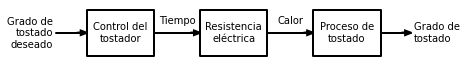

In [1]:
%config InLineBackend.figure_format = 'svg'
import schemdraw
from schemdraw import dsp

d = schemdraw.Drawing(unit=1, fontsize=10)

d += dsp.Arrow().label('Grado de\ntostado\ndeseado', 'left').right()
d += (control := dsp.Box(w=2.2, h=1.5).label('Control del\ntostador')).anchor('W')
d += dsp.Arrow().at(control.E).label('Tiempo').right().length(d.unit*1.5)
d += (resistencia := dsp.Box(w=2.2, h=1.5).label('Resistencia\neléctrica')).anchor('W')
d += dsp.Arrow().label('Calor').at(resistencia.E).right().length(d.unit*1.5)
d += (proceso := dsp.Box(w=2.2, h=1.5).label('Proceso de\ntostado')).anchor('W')
d += dsp.Arrow().at(proceso.E).label('Grado de\ntostado', 'right').right()

d.draw()

 También se podría diseñar un sistema de control de lazo cerrado, también
denominado por retroalimentación o *feedback*:

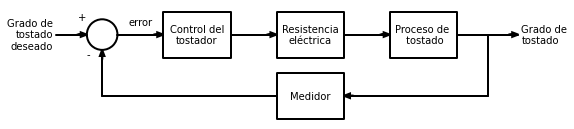

In [2]:
d = schemdraw.Drawing(unit=1, fontsize=10)

d += dsp.Line().label('Grado de\ntostado\ndeseado', 'left')
d += dsp.Arrowhead().right().label('+', 'top')
d += (sum := dsp.Circle().anchor('W'))
d += dsp.Arrow().label('error', 'top').right().length(1.5)
d += (control := dsp.Box(w=2.2, h=1.5).label('Control del\ntostador')).anchor('W')
d += dsp.Arrow().at(control.E).right().length(d.unit*1.5)
d += (resistencia := dsp.Box(w=2.2, h=1.5).label('Resistencia\neléctrica')).anchor('W')
d += dsp.Arrow().at(resistencia.E).right().length(d.unit*1.5)
d += (proceso := dsp.Box(w=2.2, h=1.5).label('Proceso de \n tostado')).anchor('W')
d += dsp.Line().at(proceso.E).right()
d += (outp := dsp.Dot(radius=0))
d += dsp.Arrow().label('Grado de\ntostado', 'right')
d += dsp.Line().down().length(2).at(outp.center)
d += dsp.Arrow().left().length(1.5+3.2)
d += (medidor := dsp.Box(w=2.2, h=1.5).label('Medidor').anchor('E'))
d += dsp.Line().at(medidor.W).left().tox(sum.S)
d += dsp.Line().up().to(sum.S)
d += dsp.Arrowhead().label('-', 'top')

d.draw()

 

El medidor del grado de tostado podría medir el color en la superficie
de la tostada, de manera que se logrará siempre tener el grado de
tostado óptimo. Así se evitaría el problema más habitual de los
tostadores: la primera tostada sale bien, pero las siguientes
acostumbran a salir demasiado tostadas, ya que el sistema de control en
adelanto no tiene en cuenta el hecho de que el tostador está caliente.

 

b\) **Una lavadora**

El sistema de control de una lavadora vuelve a ser un sistema de control
en adelanto. En este caso, el objetivo del sistema de control es el
*grado de limpieza*. Al seleccionar un programa de lavado se busca
obtener un cierto grado de limpieza de la ropa, aunque este grado de
limpieza no se mide en ningún momento. El sistema de control simplemente
proporciona una serie de órdenes consistentes en aperturas y cierres de
válvulas, tiempo durante tiene que estar girando el tambor, conectar y
desconectar la resistencia que calienta el agua, etc. Se puede plantear
el siguiente diagrama de bloques:

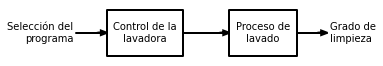

In [3]:
d = schemdraw.Drawing(unit=1, fontsize=10)

d += dsp.Arrow().label('Selección del\nprograma', 'left').right()
d += (control := dsp.Box(w=2.5, h=1.5).label('Control de la\nlavadora')).anchor('W')
d += dsp.Arrow().at(control.E).right().length(d.unit*1.5)
d += (resistencia := dsp.Box(w=2.2, h=1.5).label('Proceso de\nlavado')).anchor('W')
d += dsp.Arrow().at(resistencia.E).label('Grado de\nlimpieza', 'right').right()

d.draw()

 

Se puede diseñar fácilmente un sistema de control por retroalimentación
(lazo cerrado). Este sistema continuaría utilizando un sistema de
control en adelanto para la gestión de los diferentes programas, pero
utilizaría un sistema de control por retroalimentación para determinar
cuándo debe renovar el agua de lavado, lo que supone un ahorro en el
consumo de agua ya que no se sustituiría hasta que no fuese
estrictamente necesario. Para ello mediría la turbidez del agua mediante
un sensor adecuado. En el momento que el agua no fuera lo
suficientemente transparente (lo que indicaría que ya no tiene más
capacidad de eliminar la suciedad de la ropa), la lavadora procedería a
su sustitución. Este sistema de control ya está disponible en algunas
lavadoras de gama alta.

 

c\) **El piloto automático de un avión**

En este caso el sistema de control es por retroalimentación. Se marca al
piloto automático una dirección de vuelo, el sistema de control mide la
dirección del avión y según el error entre la dirección seguida y la
deseada (consigna) se marcan la posición de los alerones y del timón, lo
que hace modificar la dirección actual del avión para acercarla a la
deseada. Un diagrama de bloques simplificado sería el siguiente:

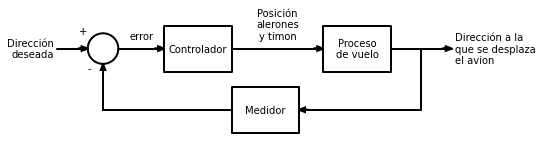

In [4]:
d = schemdraw.Drawing(unit=1, fontsize=10)

d += dsp.Line().label('Dirección\ndeseada', 'left')
d += dsp.Arrowhead().right().label('+', 'top')
d += (sum := dsp.Circle().anchor('W'))
d += dsp.Arrow().label('error', 'top').right().length(1.5)
d += (control := dsp.Box(w=2.2, h=1.5).label('Controlador')).anchor('W')
d += dsp.Arrow().at(control.E).right().length(d.unit*3).label('Posición\nalerones\ny timon', 'top')
d += (proceso := dsp.Box(w=2.2, h=1.5).label('Proceso\nde vuelo')).anchor('W')
d += dsp.Line().at(proceso.E).right()
d += (outp := dsp.Dot(radius=0))
d += dsp.Arrow().label('Dirección a la\nque se desplaza\nel avion', 'right')
d += dsp.Line().down().length(2).at(outp.center)
d += dsp.Arrow().left().length(4)
d += (medidor := dsp.Box(w=2.2, h=1.5).label('Medidor').anchor('E'))
d += dsp.Line().at(medidor.W).left().tox(sum.S)
d += dsp.Line().up().to(sum.S)
d += dsp.Arrowhead().label('-', 'top')

d.draw()